In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, LSTM
import tensorflow as tf

In [51]:
df_train = pd.read_csv("https://raw.githubusercontent.com/Ahmad20/Time-Series---LSTM/main/DailyDelhiClimateTrain.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/Ahmad20/Time-Series---LSTM/main/DailyDelhiClimateTest.csv")

In [52]:
print(df_train.tail())
print(df_test.tail())

            date   meantemp    humidity  wind_speed  meanpressure
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000
           date  meantemp   humidity  wind_speed  meanpressure
109  2017-04-20    34.500  27.500000    5.562500    998.625000
110  2017-04-21    34.250  39.375000    6.962500    999.875000
111  2017-04-22    32.900  40.900000    8.890000   1001.600000
112  2017-04-23    32.875  27.500000    9.962500   1002.125000
113  2017-04-24    32.000  27.142857   12.157143   1004.142857


In [53]:
print("========================Train")
print(df_train.isna().sum())
print(df_train.dtypes)
print(df_train.describe())
print("========================Test")
print(df_test.isna().sum())
print(df_test.dtypes)
print(df_test.describe())

========================Train
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333
========================Test
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
date             object
meantemp        float64
humidity        float6

Text(0.5, 1.0, 'Rerata Suhu')

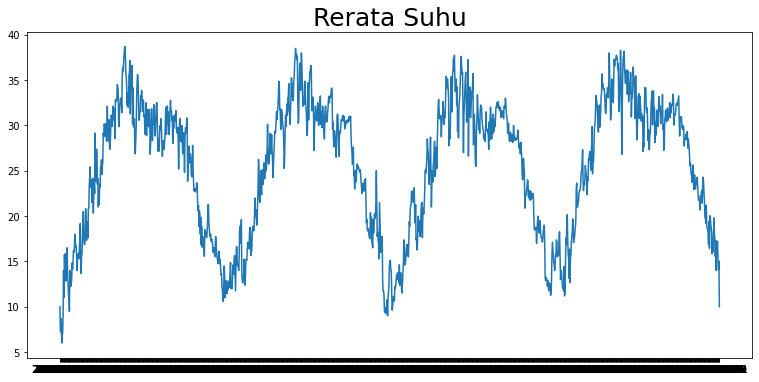

In [46]:
dates = df_train['date'].values
temp = df_train['meantemp'].values

plt.figure(figsize=(13,6))
plt.plot(dates,temp)
plt.title("Rerata Suhu", fontsize=25)

In [47]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [48]:
train_set = windowed_dataset(temp, 60, 100, 1000)
model = tf.keras.models.Sequential([
     tf.keras.layers.LSTM(60, return_sequences=True),
     tf.keras.layers.LSTM(60),
     tf.keras.layers.Dense(30, activation="relu"),
     tf.keras.layers.Dense(10, activation="relu"),
     tf.keras.layers.Dense(1),
    ])

In [55]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=.9)
model.compile(
    loss = tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=["mae"])
history = model.fit(train_set, epochs=30)

Epoch 1/30
15/15 [==============================] - 5s 101ms/step - loss: 1.2249 - mae: 1.6622
Epoch 2/30
15/15 [==============================] - 2s 101ms/step - loss: 1.2007 - mae: 1.6325
Epoch 3/30
15/15 [==============================] - 2s 102ms/step - loss: 1.7001 - mae: 2.1511
Epoch 4/30
15/15 [==============================] - 2s 101ms/step - loss: 1.2450 - mae: 1.6786
Epoch 5/30
15/15 [==============================] - 2s 101ms/step - loss: 1.3173 - mae: 1.7522
Epoch 6/30
15/15 [==============================] - 2s 101ms/step - loss: 1.2284 - mae: 1.6675
Epoch 7/30
15/15 [==============================] - 2s 101ms/step - loss: 1.3665 - mae: 1.8047
Epoch 8/30
15/15 [==============================] - 2s 101ms/step - loss: 1.1947 - mae: 1.6276
Epoch 9/30
15/15 [==============================] - 2s 103ms/step - loss: 1.1883 - mae: 1.6188
Epoch 10/30
15/15 [==============================] - 2s 101ms/step - loss: 1.1153 - mae: 1.5387
Epoch 11/30
15/15 [==============================